# Lab - End-to-end Machine Learning

### Dataset

Vamos trabalhar com dataset de e-commerce da [Olist](https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce).

Neste dataset temos informações de ordens, entrega, localizações, reviews, preços e etc

### Hipótese

**Será que podemos prever qual rating que o cliente dará ao serviço?**

Quais os motivos para que um pedido seja mal avaliado?

1.   Atraso na entrega
2.   Pedido veio errado, com defeito ou não satisfez a necessidade do cliente

### O Fluxo de Modelagem:

Este fluxo deve ser cíclico, ou seja, devemos repetir os passos até chegar na performance adequada do modelo.

1. EDA
  * Uma análise minuciosa dos dados que será insumo para feature engineering e modelagem


Neste notebook, vamos simplificar todas estas etapas, como por exemplo a EDA. Porém, cabe a cada um aprimorar este pipeline para encontrar melhores modelos, como por exemplo: testar diferentes tipos de feature engineering, encoding e modelos.

In [116]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 500)
import warnings

from pathlib import Path
import pickle
warnings.filterwarnings('ignore')

# Importando libs de plots
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
# sns.set_context('talk')
sns.set_palette('rainbow')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

In [117]:
df = pd.read_csv("olist_final_dataset_clean.csv")

df.head()

,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,geolocation_zip_code_prefix_x,s_lat,s_lng,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_zip_code_prefix,customer_city,customer_state,payment_value,review_score,geolocation_zip_code_prefix_y,c_lat,c_lng,order_delay_time,order_time_to_process,product_volume_cm3,total_cost
0,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,27277,volta redonda,SP,27277.0,-22.496953,-44.127492,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,28013,campos dos goytacazes,RJ,72.19,5.0,28013.0,-21.762775,-41.309633,-9,6,3528.0,72.19
1,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,3471,sao paulo,SP,3471.0,-23.565096,-46.518565,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,15775,santa fe do sul,SP,259.83,4.0,15775.0,-20.220527,-50.903424,-3,7,60000.0,259.83
2,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,37564,borda da mata,MG,37564.0,-22.262584,-46.171124,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,35661,para de minas,MG,216.87,5.0,35661.0,-19.870305,-44.593326,-14,4,14157.0,216.87
3,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0,14403,franca,SP,14403.0,-20.553624,-47.387359,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,12952,atibaia,SP,25.78,4.0,12952.0,-23.089925,-46.611654,-6,7,2400.0,25.78
4,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,87900,loanda,PR,87900.0,-22.929384,-53.135873,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,13226,varzea paulista,SP,218.04,5.0,13226.0,-23.243402,-46.827614,-16,9,42000.0,218.04


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109353 entries, 0 to 109352
Data columns (total 35 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   shipping_limit_date            109353 non-null  object 
 1   price                          109353 non-null  float64
 2   freight_value                  109353 non-null  float64
 3   product_category_name          107829 non-null  object 
 4   product_name_lenght            107829 non-null  float64
 5   product_description_lenght     107829 non-null  float64
 6   product_photos_qty             107829 non-null  float64
 7   product_weight_g               109335 non-null  float64
 8   product_length_cm              109335 non-null  float64
 9   product_height_cm              109335 non-null  float64
 10  product_width_cm               109335 non-null  float64
 11  seller_zip_code_prefix         109353 non-null  int64  
 12  seller_city                   

## EDA


In [119]:
def bar_plot(df, column, orient, fig_size_1=12, fig_size_2=8, title="", xlabel="", ylabel=""):

    df_aux = pd.DataFrame(df[column].value_counts()).reset_index()
    plt.figure(figsize=(fig_size_1, fig_size_2))
    
    if orient == 'h':
        sns.barplot(x='count', y=column, data=df_aux, palette='viridis', orient='h')
        if xlabel == "":
            plt.xlabel('Count')
        else:
            plt.xlabel(xlabel)
        
        if ylabel == "":
            plt.ylabel(column)
        else:
            plt.ylabel(ylabel)
    
    else:
        sns.barplot(x=column, y='count', data=df_aux, palette='viridis', orient='v')

        if xlabel == "":
            plt.xlabel(column)
        else:
            plt.xlabel(xlabel)
        
        if ylabel == "":
            plt.ylabel('Count')
        else:
            plt.ylabel(ylabel)


    if title == "":
        plt.title(f'Contagem de \'{column}\'')
    else: 
        plt.title(title)
    plt.show()


In [120]:
def plot_top_column_by_score(df, column, N, best=True):

    if best:
        category_scores = df.groupby(column)["review_score"].mean()
        top_categories = category_scores.nlargest(N)    
        top_categories_sorted = top_categories.sort_values(ascending=False)
    
    else:
        category_scores = df.groupby(column)["review_score"].mean()
        top_categories = category_scores.nsmallest(N)
        top_categories_sorted = top_categories.sort_values(ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_categories_sorted.values, y=top_categories_sorted.index, palette="inferno")
    
    if best:
        plt.title(f"Top {N} {column} MELHOR avaliados")
    else:
        plt.title(f"Top {N} {column} PIOR avaliados")

    plt.xlabel("MÉDIA das avaliações")
    plt.ylabel(column)
    plt.show()

In [121]:
df["review_score"].value_counts()

review_score
5.000000    62866
4.000000    21035
1.000000    12436
3.000000     9200
2.000000     3659
4.500000       67
2.500000       41
3.500000       29
1.500000       18
3.333333        1
4.333333        1
Name: count, dtype: int64

In [122]:
df["review_score"] = np.floor(df["review_score"])
df["review_score"].value_counts()

review_score
5.0    62866
4.0    21103
1.0    12454
3.0     9230
2.0     3700
Name: count, dtype: int64

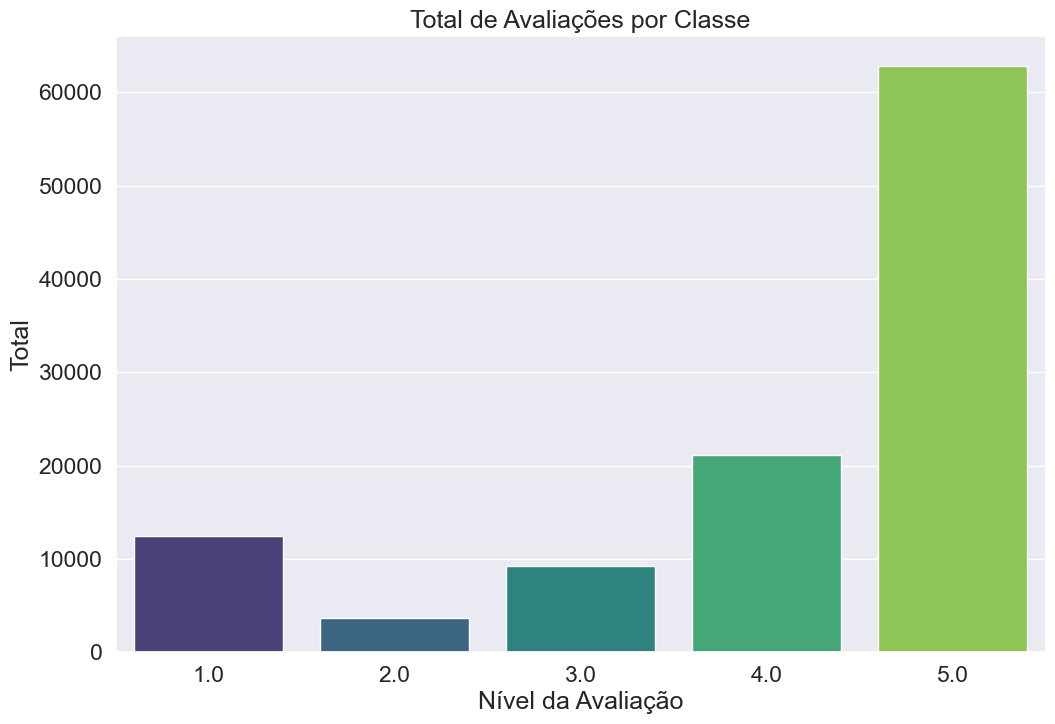

In [123]:
bar_plot(df, "review_score", 'v', 12, 8, 
         title="Total de Avaliações por Classe",
         xlabel="Nível da Avaliação",
         ylabel="Total")

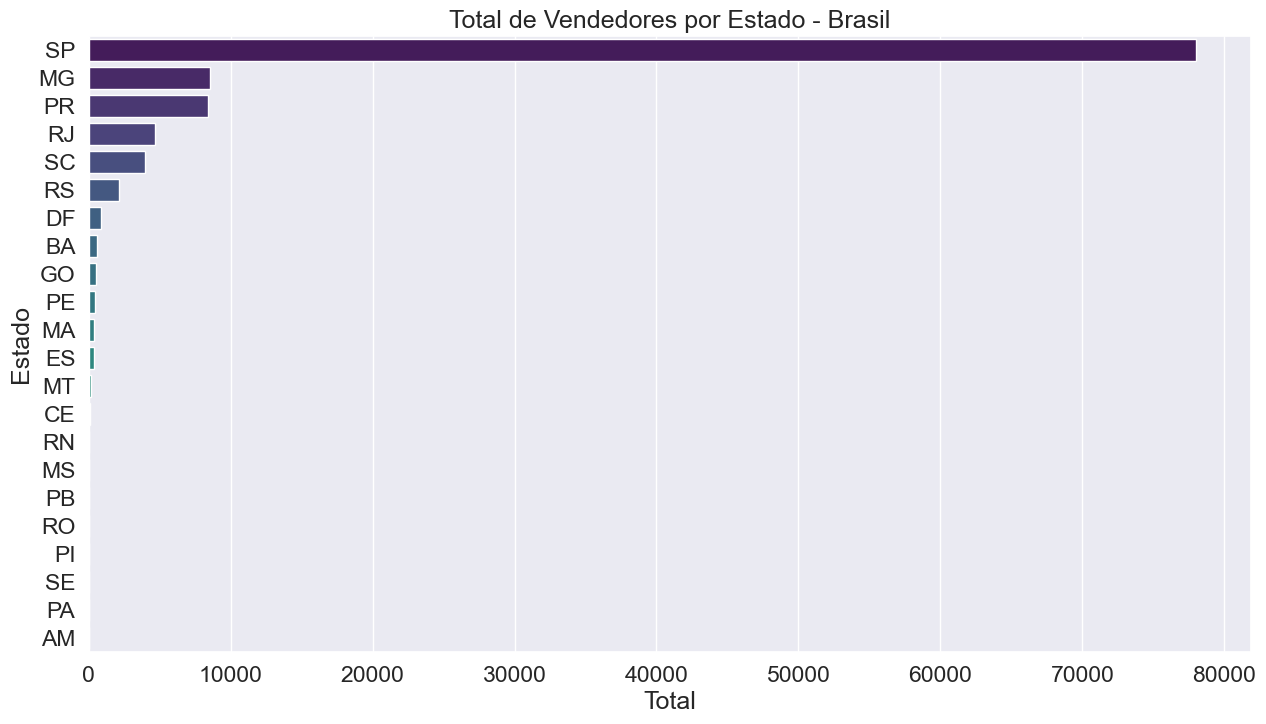

In [124]:
bar_plot(df, "seller_state", 'h', 15, 8, 
         title="Total de Vendedores por Estado - Brasil",
         xlabel="Total",
         ylabel="Estado")

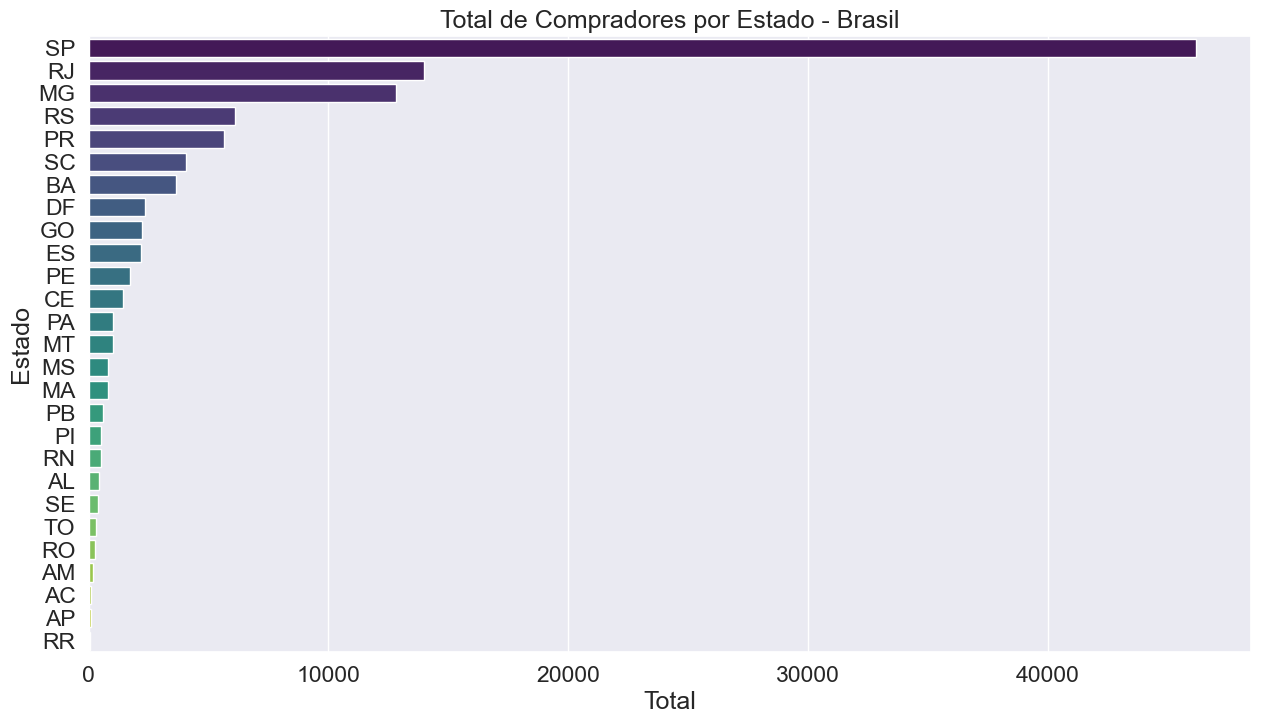

In [125]:
bar_plot(df, "customer_state", 'h', 15, 8, 
         title="Total de Compradores por Estado - Brasil",
         xlabel="Total",
         ylabel="Estado")

In [126]:
(df["review_score"] >= 4).value_counts(normalize=True)

review_score
True     0.767871
False    0.232129
Name: proportion, dtype: float64

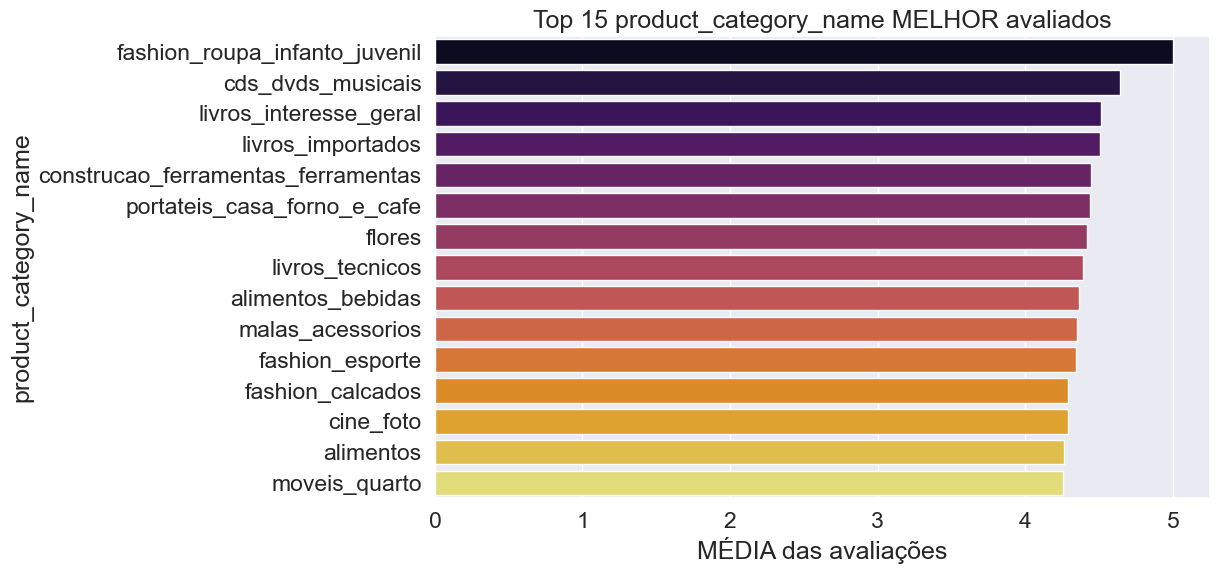

In [127]:
plot_top_column_by_score(df, "product_category_name", 15, True)

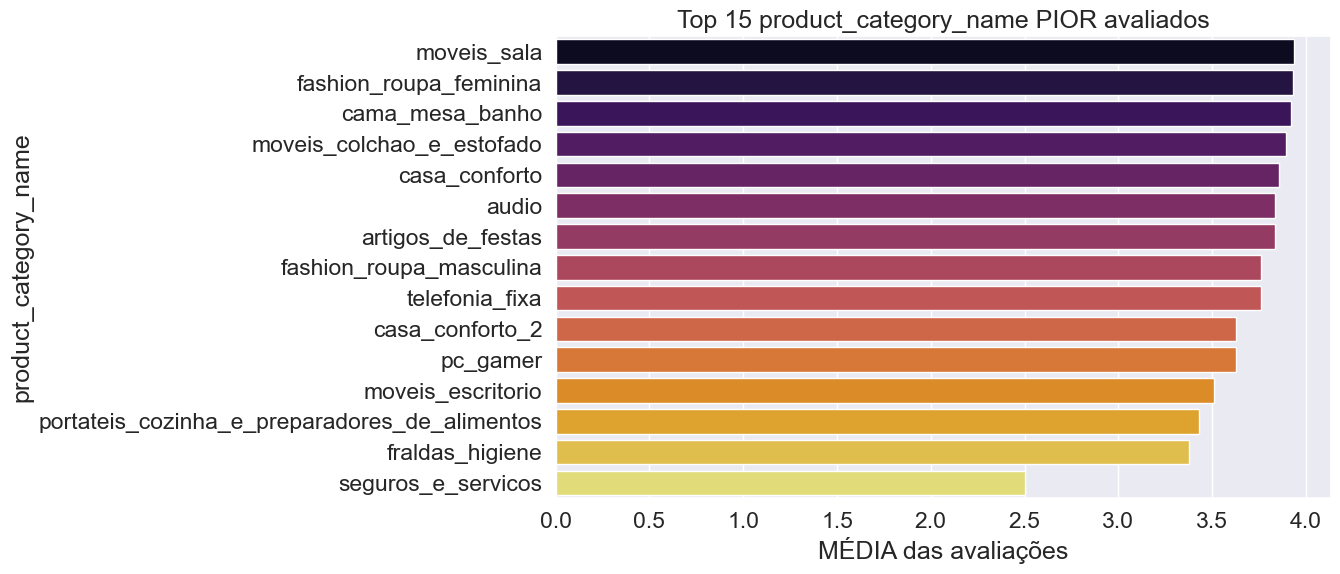

In [128]:
plot_top_column_by_score(df, "product_category_name", 15, False)

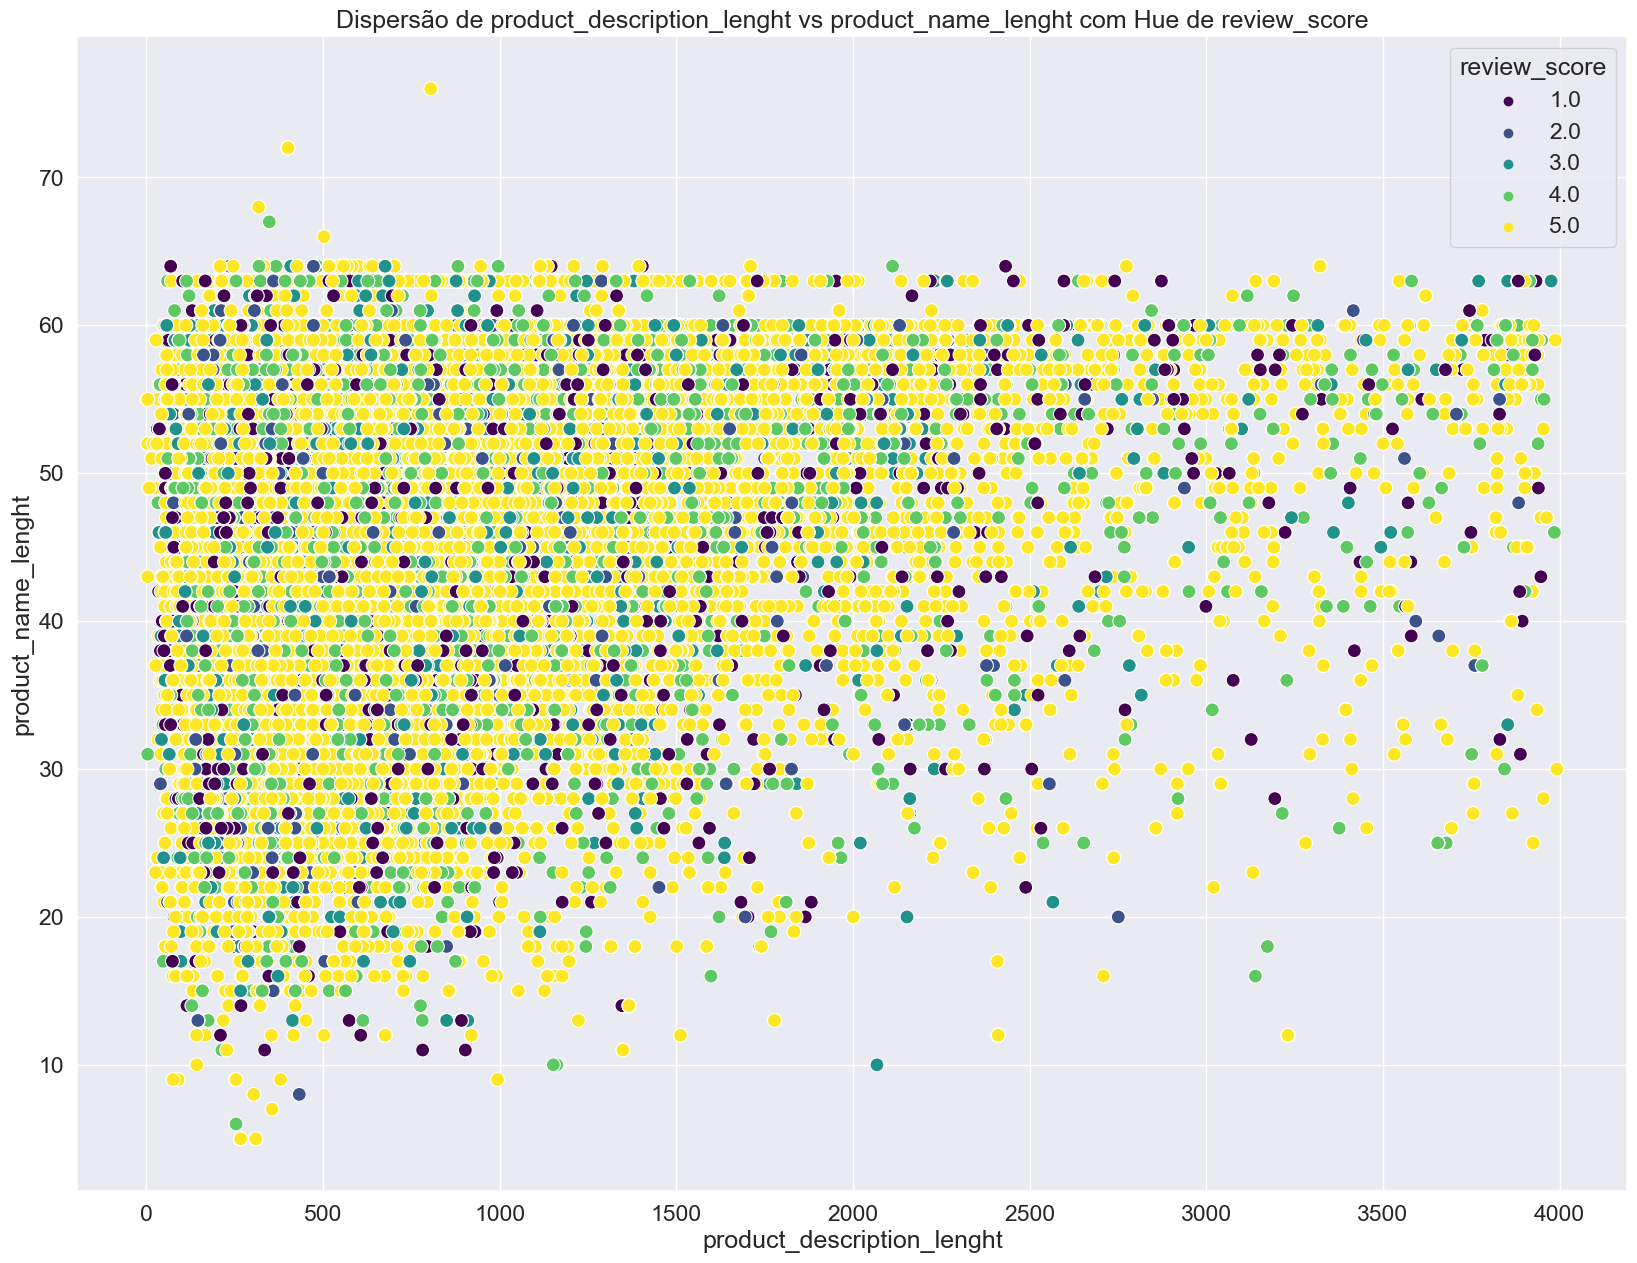

In [147]:
def plot_scatter_with_hue(df, var_x, var_y, discrete_var):
    """
    Plots a scatter plot of two continuous variables with a hue based on a discrete variable.
    
    Parameters:
    df (DataFrame): The DataFrame containing the data.
    var_x (str): The name of the column for the x variable.
    var_y (str): The name of the column for the y variable.
    discrete_var (str): The name of the column for the discrete variable (with 5 classes).

    Returns:
    None
    """
    plt.figure(figsize=(20, 15))
    sns.scatterplot(data=df, x=var_x, y=var_y, hue=discrete_var, palette="viridis", s=100)
    plt.title(f'Dispersão de {var_x} vs {var_y} com Hue de {discrete_var}')
    plt.xlabel(var_x)
    plt.ylabel(var_y)
    plt.legend(title=discrete_var)
    plt.show()

plot_scatter_with_hue(df,"product_description_lenght",  "product_name_lenght" , "review_score")

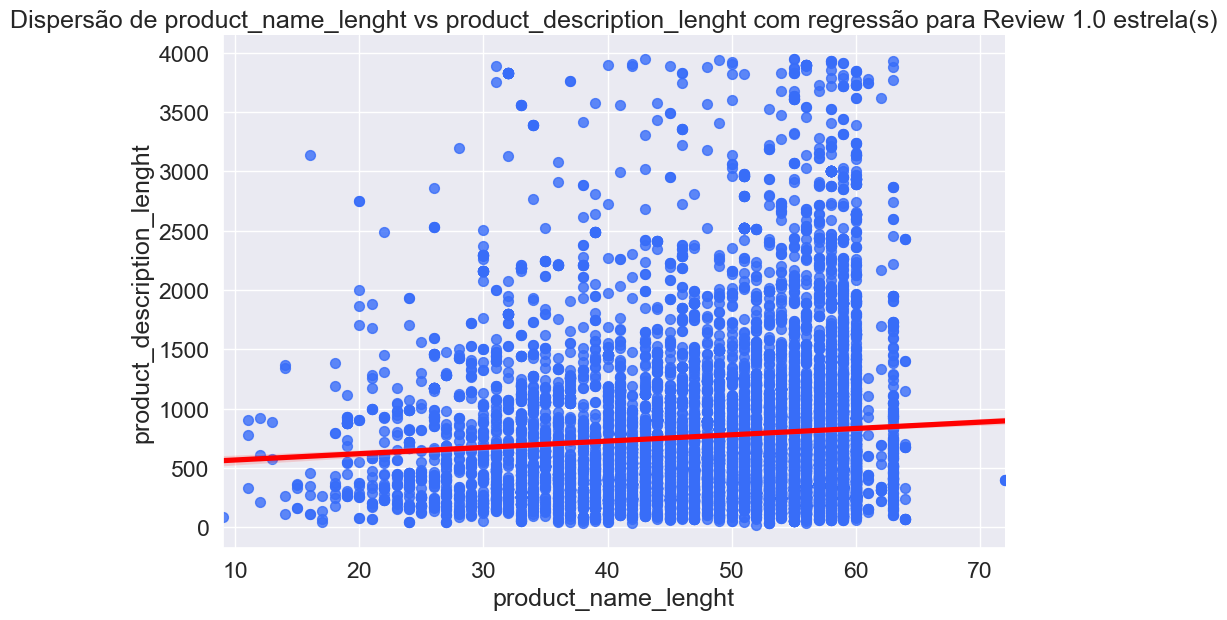

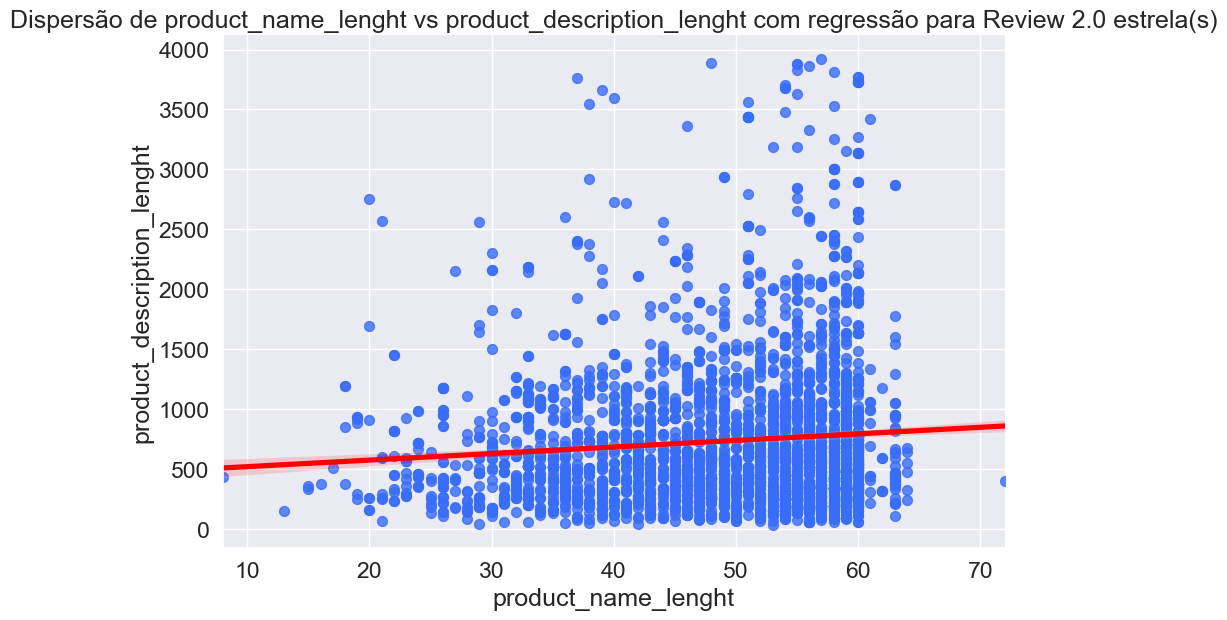

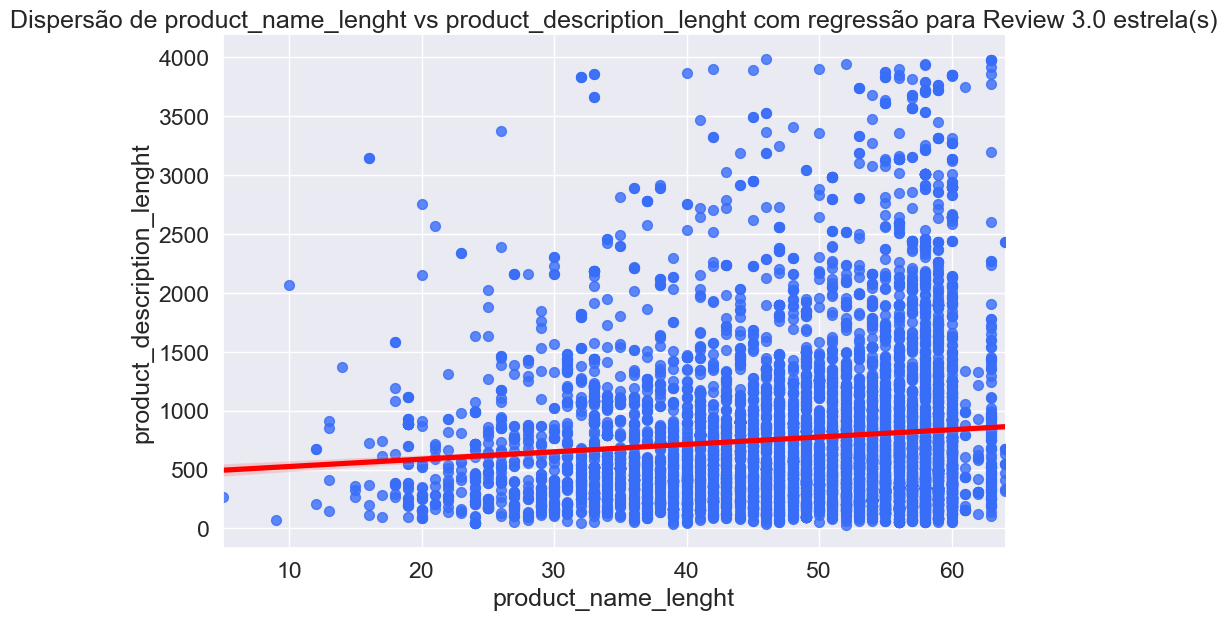

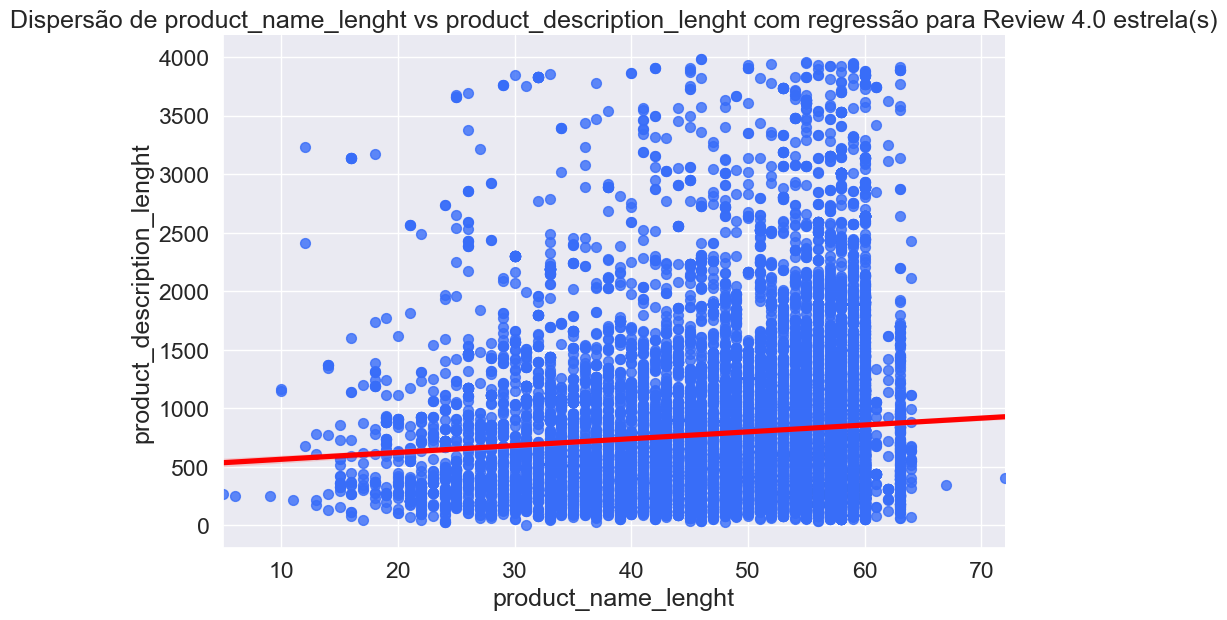

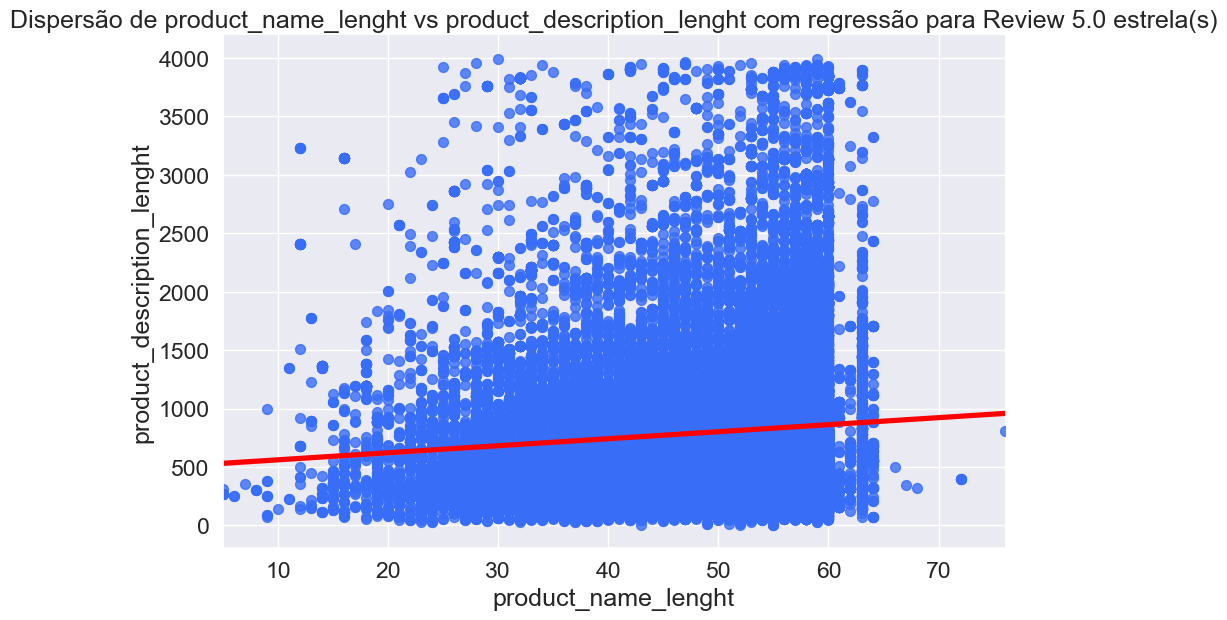

In [146]:
def plot_regression_by_classes(df, var_x, var_y, discrete_var):
    """
    Plots scatter plots with regression lines for each class in a discrete variable.
    
    Parameters:
    df (DataFrame): The DataFrame containing the data.
    var_x (str): The name of the column for the x variable.
    var_y (str): The name of the column for the y variable.
    discrete_var (str): The name of the column for the discrete variable (with 5 classes).

    Returns:
    None
    """
    unique_classes = sorted(df[discrete_var].unique())
    
    for cls in unique_classes:
        sns.lmplot(data=df[df[discrete_var] == cls], x=var_x, y=var_y, 
                   height=6, aspect=1.5, scatter_kws={'s':50}, line_kws={'color': 'red'})
        plt.title(f'Dispersão de {var_x} vs {var_y} com regressão para Review {cls} estrela(s)')
        plt.xlabel(var_x)
        plt.ylabel(var_y)
        plt.show()


plot_regression_by_classes(df, "product_name_lenght", "product_description_lenght", "review_score")

In [131]:
df[["price", "freight_value"]].describe()

,price,freight_value
count,109353.000000,109353.000000
mean,119.864487,19.944887
std,181.102280,15.691064
min,0.850000,0.000000
25%,39.900000,13.070000
50%,74.900000,16.260000
75%,134.170000,21.150000
max,6735.000000,409.680000


In [132]:
df_eda = df.copy()

df_eda["total_cost"].describe().to_frame()

,total_cost
count,109353.000000
mean,139.809373
std,188.093562
min,6.080000
25%,55.160000
50%,92.110000
75%,157.470000
max,6929.310000


In [133]:
df_eda[["price", "freight_value", "total_cost"]].corr()

,price,freight_value,total_cost
price,1.000000,0.410837,0.997104
freight_value,0.410837,1.000000,0.478988
total_cost,0.997104,0.478988,1.000000


In [136]:
df_eda

,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,geolocation_zip_code_prefix_x,s_lat,s_lng,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_zip_code_prefix,customer_city,customer_state,payment_value,review_score,geolocation_zip_code_prefix_y,c_lat,c_lng,order_delay_time,order_time_to_process,product_volume_cm3,total_cost
0,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,27277,volta redonda,SP,27277.0,-22.496953,-44.127492,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,28013,campos dos goytacazes,RJ,72.19,5.0,28013.0,-21.762775,-41.309633,-9,6,3528.0,72.19
1,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,3471,sao paulo,SP,3471.0,-23.565096,-46.518565,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,15775,santa fe do sul,SP,259.83,4.0,15775.0,-20.220527,-50.903424,-3,7,60000.0,259.83
2,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,37564,borda da mata,MG,37564.0,-22.262584,-46.171124,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,35661,para de minas,MG,216.87,5.0,35661.0,-19.870305,-44.593326,-14,4,14157.0,216.87
3,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0,14403,franca,SP,14403.0,-20.553624,-47.387359,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,12952,atibaia,SP,25.78,4.0,12952.0,-23.089925,-46.611654,-6,7,2400.0,25.78
4,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,87900,loanda,PR,87900.0,-22.929384,-53.135873,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,13226,varzea paulista,SP,218.04,5.0,13226.0,-23.243402,-46.827614,-16,9,42000.0,218.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109348,2018-05-02 04:11:01,299.99,43.41,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,88303,itajai,SC,88303.0,-26.912574,-48.673980,delivered,2018-04-23 13:57:06,2018-04-25 04:11:01,2018-04-25 12:09:00,2018-05-10 22:56:40,2018-05-18,65077,sao luis,MA,343.40,5.0,65077.0,-2.497993,-44.297761,-8,8,53400.0,343.40
109349,2018-07-20 04:31:48,350.00,36.53,informatica_acessorios,31.0,232.0,1.0,8950.0,45.0,26.0,38.0,1206,sao paulo,SP,1206.0,-23.535864,-46.642819,delivered,2018-07-14 10:26:46,2018-07-17 04:31:48,2018-07-17 08:05:00,2018-07-23 20:31:55,2018-08-01,81690,curitiba,PR,386.53,5.0,81690.0,-25.566904,-49.309115,-9,5,44460.0,386.53
109350,2017-10-30 17:14:25,99.90,16.95,esporte_lazer,43.0,869.0,1.0,967.0,21.0,24.0,19.0,80610,curitiba,PR,80610.0,-25.469955,-49.289821,delivered,2017-10-23 17:07:56,2017-10-24 17:14:25,2017-10-26 15:13:14,2017-10-28 12:22:22,2017-11-10,4039,sao paulo,SP,116.85,5.0,4039.0,-23.597794,-46.643923,-13,7,9576.0,116.85
109351,2017-08-21 00:04:32,55.99,8.72,informatica_acessorios,56.0,1306.0,1.0,100.0,20.0,20.0,20.0,4733,sao paulo,SP,4733.0,-23.635530,-46.694031,delivered,2017-08-14 23:02:59,2017-08-15 00:04:32,2017-08-15 19:02:53,2017-08-16 21:59:40,2017-08-25,13289,vinhedo,SP,64.71,5.0,13289.0,-23.040252,-46.979782,-9,6,8000.0,64.71


In [135]:
delay_time_scores = df.groupby("review_score")["order_delay_time"].mean()
delay_time_scores

review_score
1.0    -5.931909
2.0    -9.720270
3.0   -11.097725
4.0   -12.476567
5.0   -13.420291
Name: order_delay_time, dtype: float64

 - Quanto mais adiantado o produto, maior a chance dele ser bem avaliado?
  

In [143]:
time_to_process_scores = df.groupby("review_score")["order_time_to_process"].mean()
time_to_process_scores

review_score
1.0    6.722900
2.0    6.650541
3.0    6.586566
4.0    6.459792
5.0    6.327172
Name: order_time_to_process, dtype: float64

In [145]:
photo_qty_scores = df.groupby("review_score")["product_photos_qty"].mean()
photo_qty_scores

review_score
1.0    2.091691
2.0    2.154268
3.0    2.231578
4.0    2.240471
5.0    2.225219
Name: product_photos_qty, dtype: float64

In [140]:
df_eda[["order_delay_time", "order_time_to_process", "total_cost", "product_volume_cm3", "review_score"]].corr()

,order_delay_time,order_time_to_process,total_cost,product_volume_cm3,review_score
order_delay_time,1.000000,-0.136611,-0.008166,0.011247,-0.229238
order_time_to_process,-0.136611,1.000000,0.034559,0.076754,-0.025333
total_cost,-0.008166,0.034559,1.000000,0.337257,0.000379
product_volume_cm3,0.011247,0.076754,0.337257,1.000000,-0.026250
review_score,-0.229238,-0.025333,0.000379,-0.026250,1.000000
